In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/18 13:28:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Schemas can only be inferred for CSV files. 
df = spark.read.csv('StudentsPerformance.csv', inferSchema=True, header=True)
df.printSchema()

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- parental level of education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test preparation course: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading: integer (nullable = true)
 |-- writing score: integer (nullable = true)



# Data Exploration

In [90]:
# The show method allows you visualise DataFrames. We can see that there are two columns. 
df.show()

# You could also try this. 
df.columns

+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|     72|           74|
|female|       group C|               some college|    standard|              completed|        69|     90|           88|
|female|       group B|            master's degree|    standard|                   none|        90|     95|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|     57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     78|           75|
|female|       group B| 

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading',
 'writing score']

In [39]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
# But what about data type?
df.describe().show()

+-------+------+--------------+---------------------------+------------+-----------------------+------------------+------------------+-----------------+
|summary|gender|race/ethnicity|parental level of education|       lunch|test preparation course|        math score|     reading score|    writing score|
+-------+------+--------------+---------------------------+------------+-----------------------+------------------+------------------+-----------------+
|  count|  1000|          1000|                       1000|        1000|                   1000|              1000|              1000|             1000|
|   mean|  null|          null|                       null|        null|                   null|            66.089|            69.169|           68.054|
| stddev|  null|          null|                       null|        null|                   null|15.163080096009454|14.600191937252223|15.19565701086966|
|    min|female|       group A|         associate's degree|free/reduced|          

In [40]:
# For type, we can use print schema. 
# But wait! What if you want to change the format of the data? Maybe change age to an integer instead of long?
df.printSchema()

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- parental level of education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test preparation course: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading score: integer (nullable = true)
 |-- writing score: integer (nullable = true)



# Data Manipulation

In [41]:
# Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType, LongType)

In [46]:
# Then create a variable with the correct structure.
data_schema = [
              StructField('gender',StringType(),True),
              StructField('race/ethnicity',StringType(),True),
              StructField('parental level of education',StringType(),True),
              StructField('lunch',StringType(),True),
              StructField('test preparation course',StringType(),True),
              StructField('math score',IntegerType(),True),
              StructField('reading score',IntegerType(),True),
              StructField('writing score',LongType(),True)]

final_struct = StructType(fields=data_schema)

In [158]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 
df = spark.read.csv('StudentsPerformance.csv', schema=final_struct)

df.printSchema()

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- parental level of education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test preparation course: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading score: integer (nullable = true)
 |-- writing score: integer (nullable = true)



In [93]:
# Read csv again
df = spark.read.csv('StudentsPerformance.csv', inferSchema=True, header=True)
df.printSchema()

df.show()

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- parental level of education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test preparation course: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading: integer (nullable = true)
 |-- writing score: integer (nullable = true)

+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|     72|           74|
|female|       group C|               some college|    standard|              completed|        69|     90|           88|
|female|       group

In [53]:
# We can also select various columns from a DataFrame. 
df.select('lunch').show()

# We could split up these steps, first assigning the output to a variable, then showing that variable. As you see, the output is the same.
genderColumn = df.select('gender')

genderColumn.show()

+------------+
|       lunch|
+------------+
|    standard|
|    standard|
|    standard|
|free/reduced|
|    standard|
|    standard|
|    standard|
|free/reduced|
|free/reduced|
|free/reduced|
|    standard|
|    standard|
|    standard|
|    standard|
|    standard|
|    standard|
|    standard|
|free/reduced|
|free/reduced|
|free/reduced|
+------------+
only showing top 20 rows

+------+
|gender|
+------+
|female|
|female|
|female|
|  male|
|  male|
|female|
|female|
|  male|
|  male|
|female|
|  male|
|  male|
|female|
|  male|
|female|
|female|
|  male|
|female|
|  male|
|female|
+------+
only showing top 20 rows



In [54]:
# We can also add columns, manipulating the DataFrame.

df.withColumn('double_writing_score',df['writing score']*2).show()

# But note that this doesn't alter the original DataFrame. You need to assign the output to a new variable in order to do so.
df.show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+--------------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|double_writing_score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+--------------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|                 148|
|female|       group C|               some college|    standard|              completed|        69|           90|           88|                 176|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|                 186|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|       

In [84]:
# We can rename columns too! 
df.withColumnRenamed('writing score', 'ridiculousscore').show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+---------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|ridiculousscore|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+---------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|             74|
|female|       group C|               some college|    standard|              completed|        69|           90|             88|
|female|       group B|            master's degree|    standard|                   none|        90|           95|             93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|           57|             44|
|  male|       group C|               some college|    standard|                   none|  

# Introducing SQL

In [98]:
df = spark.read.csv('StudentsPerformance.csv', inferSchema=True, header=True)

# First, we have to register the DataFrame as a SQL temporary view.
df.createOrReplaceTempView('students')

# After that, we can use the SQL programming language for queries. 
results = spark.sql("SELECT * FROM students")
#results.show()

In [101]:
# Here's another example:
result = spark.sql("SELECT lunch FROM students WHERE reading >= 60")
result.show()

+------------+
|       lunch|
+------------+
|    standard|
|    standard|
|    standard|
|    standard|
|    standard|
|    standard|
|free/reduced|
|free/reduced|
|    standard|
|    standard|
|    standard|
|    standard|
|    standard|
|free/reduced|
|    standard|
|free/reduced|
|free/reduced|
|    standard|
|    standard|
|    standard|
+------------+
only showing top 20 rows



# Spark DataFrame - Operations

In [89]:
df = spark.read.csv('StudentsPerformance.csv', inferSchema=True, header=True)

# Let's get a better look at the data.
# We know that we can show a DataFrame, but that's resulted in a mess! 
df.show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group C|               some college|    standard|              completed|        69|           90|           88|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|           57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     

In [90]:
# Instead, let's just grab the first row. Much neater! 
df.head(1)

[Row(gender='female', race/ethnicity='group B', parental level of education="bachelor's degree", lunch='standard', test preparation course='none', math score=72, reading score=72, writing score=74)]

# DataFrame Methods

In [94]:
df = spark.read.csv('StudentsPerformance.csv', inferSchema=True, header=True)

# Even though we know SQL is available, let's try out some of the DataFrame methods.
# For this example, let's have a look at the opeening and closing value where close is less than 500.
df.filter("reading < 50").select('race/ethnicity','parental level of education').show()

+--------------+---------------------------+
|race/ethnicity|parental level of education|
+--------------+---------------------------+
|       group B|               some college|
|       group B|           some high school|
|       group C|            master's degree|
|       group D|               some college|
|       group C|               some college|
|       group C|                high school|
|       group C|           some high school|
|       group A|           some high school|
|       group D|           some high school|
|       group C|           some high school|
|       group B|         associate's degree|
|       group E|           some high school|
|       group B|         associate's degree|
|       group B|                high school|
|       group A|               some college|
|       group D|                high school|
|       group C|                high school|
|       group C|         associate's degree|
|       group B|                high school|
|       gr

In [102]:
# We can also use Python within the DataFrame filter method!
df.filter(df['reading'] < 80).select('test preparation course','lunch').show()

+-----------------------+------------+
|test preparation course|       lunch|
+-----------------------+------------+
|                   none|    standard|
|                   none|free/reduced|
|                   none|    standard|
|                   none|free/reduced|
|              completed|free/reduced|
|                   none|free/reduced|
|                   none|    standard|
|                   none|    standard|
|              completed|    standard|
|                   none|    standard|
|                   none|    standard|
|                   none|free/reduced|
|              completed|free/reduced|
|                   none|free/reduced|
|                   none|    standard|
|              completed|free/reduced|
|                   none|    standard|
|                   none|    standard|
|              completed|free/reduced|
|                   none|free/reduced|
+-----------------------+------------+
only showing top 20 rows



In [104]:
# And we can use multiple operations! 
# Here we're looking for significant increases in stock.
df.filter( (df['reading'] > 60) & (df['math score'] < 49) ).select('test preparation course','lunch').show()

+-----------------------+------------+
|test preparation course|       lunch|
+-----------------------+------------+
|                   none|    standard|
|                   none|free/reduced|
|                   none|free/reduced|
|              completed|free/reduced|
|                   none|free/reduced|
|              completed|free/reduced|
|                   none|free/reduced|
|                   none|    standard|
|                   none|free/reduced|
|              completed|free/reduced|
|                   none|    standard|
|              completed|free/reduced|
|                   none|free/reduced|
|              completed|free/reduced|
|                   none|free/reduced|
|                   none|    standard|
|                   none|    standard|
+-----------------------+------------+



# Using Collect

In [ ]:
df = spark.read.csv('StudentsPerformance.csv', inferSchema=True, header=True)

In [125]:
# Let's pick a row of data with a low of $197.16 and collect it.  
studentResult = df.filter(df['reading'] == 17).collect()

In [126]:
# When we collect it, you may notice an interesting format. 
studentResult

[Row(gender='female', race/ethnicity='group C', parental level of education='some high school', lunch='free/reduced', test preparation course='none', math score=0, reading=17, writing score=10)]

In [127]:
# We can select the first row of data to shed the outer brackets.
studentRow = studentResult[0]

studentRow

Row(gender='female', race/ethnicity='group C', parental level of education='some high school', lunch='free/reduced', test preparation course='none', math score=0, reading=17, writing score=10)

In [128]:
# And then visualise it simply as a dictionary. 
studentRow.asDict()

{'gender': 'female',
 'race/ethnicity': 'group C',
 'parental level of education': 'some high school',
 'lunch': 'free/reduced',
 'test preparation course': 'none',
 'math score': 0,
 'reading': 17,
 'writing score': 10}

In [129]:
# Why convert it into a dictionary? Because dictionaries have a lot of methods available.
# For example, we can simply call volume from the dictionary. 
studentRow.asDict()['gender']

'female'

# Aggregation

In [17]:
# Let's import the relevant functions.
from pyspark.sql.functions import dayofmonth,month,hour,year,format_number

df = spark.read.csv('StudentsPerformance.csv', inferSchema=True, header=True)

In [160]:
# We can also group, and show the averages of each group.
df.groupBy('race/ethnicity').mean().show()

+--------------+-----------------+-----------------+------------------+
|race/ethnicity|  avg(math score)|     avg(reading)|avg(writing score)|
+--------------+-----------------+-----------------+------------------+
|       group B|63.45263157894737|67.35263157894737|              65.6|
|       group C|64.46394984326018|69.10344827586206| 67.82758620689656|
|       group D|67.36259541984732|70.03053435114504| 70.14503816793894|
|       group A|61.62921348314607|64.67415730337079|62.674157303370784|
|       group E|73.82142857142857|73.02857142857142| 71.40714285714286|
+--------------+-----------------+-----------------+------------------+



In [174]:
# Instead of grouping, you can use aggregation which represents the entire dataset. 
df.agg({"reading":"mean"}).show()

+------------+
|avg(reading)|
+------------+
|      69.169|
+------------+



In [175]:
# We can also import SQL functions. 
from pyspark.sql.functions import countDistinct,avg,stddev,format_number
df.select(avg('reading').alias('Average reading')).show()

+---------------+
|Average reading|
+---------------+
|         69.169|
+---------------+



In [176]:
# We can use SQL to do some basic manipulation.
# Here we're getting the standard deviation in sales, formatting it to two decimal places and changing the column name.
dev = df.select(stddev("reading"))

dev.select(format_number('stddev_samp(reading)',2).alias('Reading_Standard_Deviation')).show()

+--------------------------+
|Reading_Standard_Deviation|
+--------------------------+
|                     14.60|
+--------------------------+



In [177]:
# Here's also a simple example of an ascending and descending sort by sales. 
df.orderBy('reading').show()

df.orderBy(df['reading'].desc()).show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|female|       group C|           some high school|free/reduced|                   none|         0|     17|           10|
|  male|       group A|               some college|free/reduced|                   none|        28|     23|           19|
|  male|       group B|                high school|free/reduced|                   none|        30|     24|           15|
|female|       group B|                high school|free/reduced|                   none|         8|     24|           23|
|  male|       group E|           some high school|    standard|                   none|        30|     26|           22|
|  male|       group C| 

In [138]:
# Now let's sumamrise the data by year, find the mean of each year and select the two columns we'd like to see.
df_summary = df.groupBy("race/ethnicity").mean().select(['race/ethnicity','avg(reading)'])
df_summary.show()

+--------------+-----------------+
|race/ethnicity|     avg(reading)|
+--------------+-----------------+
|       group B|67.35263157894737|
|       group C|69.10344827586206|
|       group D|70.03053435114504|
|       group A|64.67415730337079|
|       group E|73.02857142857142|
+--------------+-----------------+



In [139]:
# To make it more visually appealing, let's format the mean to two decimal places.
df_formatted = df_summary.select(['race/ethnicity', format_number("avg(reading)",2)])
df_formatted.show()

+--------------+------------------------------+
|race/ethnicity|format_number(avg(reading), 2)|
+--------------+------------------------------+
|       group B|                         67.35|
|       group C|                         69.10|
|       group D|                         70.03|
|       group A|                         64.67|
|       group E|                         73.03|
+--------------+------------------------------+



In [140]:
# Let's change the name of the column to something that makes sense.
df_renamed = df_formatted.withColumnRenamed("format_number(avg(reading), 2)","Average Reading Score")
df_renamed.show()

+--------------+---------------------+
|race/ethnicity|Average Reading Score|
+--------------+---------------------+
|       group B|                67.35|
|       group C|                69.10|
|       group D|                70.03|
|       group A|                64.67|
|       group E|                73.03|
+--------------+---------------------+



In [142]:
# And finally order it by year.
df_renamed.orderBy('race/ethnicity').show()

+--------------+---------------------+
|race/ethnicity|Average Reading Score|
+--------------+---------------------+
|       group A|                64.67|
|       group B|                67.35|
|       group C|                69.10|
|       group D|                70.03|
|       group E|                73.03|
+--------------+---------------------+



# Spark DataFrame - Data Cleaning

In [162]:
# Importing data which has a header. Schema is automatically configured.
df1 = spark.read.csv('StudentsPerformance-Copy1.csv', header=True, inferSchema=True)

# Let's see the data. You'll notice nulls.
df1.show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|  null|       group B|          bachelor's degree|    standard|                   none|      null|     72|           74|
|female|       group C|               some college|    standard|              completed|        69|   null|           88|
|female|       group B|            master's degree|    standard|                   none|        90|   null|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|     57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     78|           75|
|female|       group B| 

In [163]:
# Using this syntax, we can drop any row with missing data. Three rows are dropped.
df1.na.drop().show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|  male|       group A|         associate's degree|free/reduced|                   none|        47|     57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     78|           75|
|female|       group B|         associate's degree|    standard|                   none|        71|     83|           78|
|female|       group B|               some college|    standard|              completed|        88|     95|           92|
+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+



In [164]:
# Drops a row if a value from a particular row is missing. Two rows are dropped.
df1.na.drop(subset="reading").show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|  null|       group B|          bachelor's degree|    standard|                   none|      null|     72|           74|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|     57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     78|           75|
|female|       group B|         associate's degree|    standard|                   none|        71|     83|           78|
|female|       group B|               some college|    standard|              completed|        88|     95|           92|
|  male|          null| 

In [165]:
# Instead of dropping the row, this fills null string types with FILL VALUE. 
df1.na.fill("FILL VALUE").show()

# Spark will only apply numbers to number data types, and strings to string data types.
df1.na.fill(0).show()

# However, it's good practice to specify the row you want to fill using subset. 
df1.na.fill('group X', subset=['race/ethnicity']).show()

+----------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|    gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading|writing score|
+----------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|FILL VALUE|       group B|          bachelor's degree|    standard|                   none|      null|     72|           74|
|    female|       group C|               some college|    standard|              completed|        69|   null|           88|
|    female|       group B|            master's degree|    standard|                   none|        90|   null|           93|
|      male|       group A|         associate's degree|free/reduced|                   none|        47|     57|           44|
|      male|       group C|               some college|    standard|                   none|        76|     78|       

In [170]:
# Also, it's good practice to use your sales average to fill missing data. 
from pyspark.sql.functions import mean

# Let's collect the average. You'll notice that the collection returns the average in an interesting format.
mean_reading = df1.select(mean(df1['reading'])).collect()
mean_reading

[Row(avg(reading)=70.28571428571429)]

In [171]:
# If we use the index, we should be able to access the actual value.
mean_reading[0]

Row(avg(reading)=70.28571428571429)

In [172]:
# Looks like we need to go one level deeper. Perfect! Let's assign that value to a variable.
mean_reading[0][0]
mean_reading_val = mean_reading[0][0]

In [173]:
# And finally, fill the missing values with the mean.
df1.na.fill(mean_reading_val, subset=['reading']).show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|  null|       group B|          bachelor's degree|    standard|                   none|      null|     72|           74|
|female|       group C|               some college|    standard|              completed|        69|     70|           88|
|female|       group B|            master's degree|    standard|                   none|        90|     70|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|     57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     78|           75|
|female|       group B| 

In [18]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def categorize_reading_score(reading):
    if reading >= 90:
        return "High"
    elif reading >= 70:
        return "Medium"
    else:
        return "Low"

categorize_reading_score_udf = udf(categorize_reading_score, StringType())
df = df.withColumn("ReadingScoreCategory", categorize_reading_score_udf(df["reading"]))

df.show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+--------------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading|writing score|ReadingScoreCategory|
+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+--------------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|     72|           74|              Medium|
|female|       group C|               some college|    standard|              completed|        69|     90|           88|                High|
|female|       group B|            master's degree|    standard|                   none|        90|     95|           93|                High|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|     57|           44|                 Low|

# Linear Regression

In [13]:
# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.regression import LinearRegression

data = spark.read.csv('StudentsPerformance.csv', inferSchema=True, header=True)
#df.show()

# Print the schema of the DataFrame. You can see potential features as well as the predictor.
data.printSchema()

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- parental level of education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test preparation course: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading: integer (nullable = true)
 |-- writing score: integer (nullable = true)



In [14]:
# Let's focus on one row to make it easier to read.
data.head()

Row(gender='female', race/ethnicity='group B', parental level of education="bachelor's degree", lunch='standard', test preparation course='none', math score=72, reading=72, writing score=74)

In [15]:
# A simple for loop allows us to make it even clearer. 
for item in data.head():
    print(item)

female
group B
bachelor's degree
standard
none
72
72
74


# Log

In [22]:
from pyspark.sql.functions import col, log1p

df = df.withColumn("log_math_score", log1p(col("math score")))

df.select("log_math_score").show()

+------------------+
|    log_math_score|
+------------------+
| 4.290459441148391|
| 4.248495242049359|
|  4.51085950651685|
|3.8712010109078907|
| 4.343805421853684|
| 4.276666119016055|
|  4.48863636973214|
| 3.713572066704308|
| 4.174387269895637|
|3.6635616461296463|
|  4.07753744390572|
| 3.713572066704308|
| 4.189654742026425|
|4.3694478524670215|
|3.9318256327243257|
| 4.248495242049359|
|  4.48863636973214|
|2.9444389791664403|
|3.8501476017100584|
| 4.007333185232471|
+------------------+
only showing top 20 rows



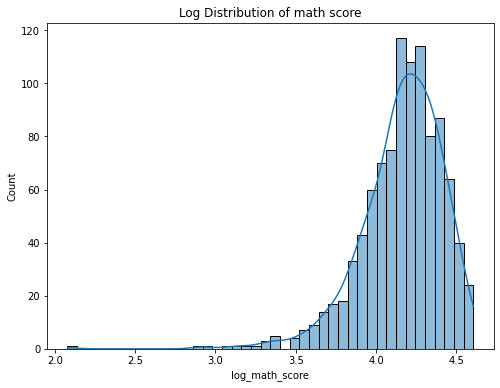

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import log

spark = SparkSession.builder.appName("basics").getOrCreate()

df = spark.read.csv("StudentsPerformance.csv", header=True, inferSchema=True)

log_columns = ["math score"]
for column in log_columns:
    df = df.withColumn(f"log_math_score", log(col(column)))

log_transformed_data = df.select([f"log_math_score" for column in log_columns])

log_transformed_data_pandas = log_transformed_data.toPandas()

for column in log_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(log_transformed_data_pandas[f"log_math_score"], kde=True)
    plt.xlabel(f"log_math_score")
    plt.title(f"Log Distribution of math score")
    plt.show()



# Setting Up a DataFrame for Machine Learning (MLlib)

In [6]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [7]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=["math score", "reading", "writing score"],
    outputCol="features")

In [8]:
# Now that we've created the assembler variable, let's actually transform the data.
output = assembler.transform(data)

In [9]:
# Using print schema, you see that the features output column has been added. 
output.printSchema()

# You can see that the features column is a dense vector that combines the various features as expected.
output.head(1)

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- parental level of education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test preparation course: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading: integer (nullable = true)
 |-- writing score: integer (nullable = true)
 |-- features: vector (nullable = true)



[Row(gender='female', race/ethnicity='group B', parental level of education="bachelor's degree", lunch='standard', test preparation course='none', math score=72, reading=72, writing score=74, features=DenseVector([72.0, 72.0, 74.0]))]

In [10]:
df.show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|     72|           74|
|female|       group C|               some college|    standard|              completed|        69|     90|           88|
|female|       group B|            master's degree|    standard|                   none|        90|     95|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|     57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     78|           75|
|female|       group B| 

In [11]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_data = output.select("features",'math score')
final_data.show()

+----------------+----------+
|        features|math score|
+----------------+----------+
|[72.0,72.0,74.0]|        72|
|[69.0,90.0,88.0]|        69|
|[90.0,95.0,93.0]|        90|
|[47.0,57.0,44.0]|        47|
|[76.0,78.0,75.0]|        76|
|[71.0,83.0,78.0]|        71|
|[88.0,95.0,92.0]|        88|
|[40.0,43.0,39.0]|        40|
|[64.0,64.0,67.0]|        64|
|[38.0,60.0,50.0]|        38|
|[58.0,54.0,52.0]|        58|
|[40.0,52.0,43.0]|        40|
|[65.0,81.0,73.0]|        65|
|[78.0,72.0,70.0]|        78|
|[50.0,53.0,58.0]|        50|
|[69.0,75.0,78.0]|        69|
|[88.0,89.0,86.0]|        88|
|[18.0,32.0,28.0]|        18|
|[46.0,42.0,46.0]|        46|
|[54.0,58.0,61.0]|        54|
+----------------+----------+
only showing top 20 rows



In [104]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [105]:
# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+------------------+
|summary|        math score|
+-------+------------------+
|  count|               715|
|   mean| 65.84335664335664|
| stddev|15.268395065521096|
|    min|                 0|
|    max|               100|
+-------+------------------+

+-------+------------------+
|summary|        math score|
+-------+------------------+
|  count|               285|
|   mean| 66.70526315789473|
| stddev|14.904300601738512|
|    min|                23|
|    max|               100|
+-------+------------------+



In [106]:
lr = LinearRegression(labelCol='math score')

In [107]:
# Fit the model to the data.
lrModel = lr.fit(train_data)

23/10/18 13:00:30 WARN Instrumentation: [e676cc7d] regParam is zero, which might cause numerical instability and overfitting.


In [108]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [0.999999999999989,4.108349271539673e-15,4.472818148134447e-15] Intercept: 1.343303554016571e-13


In [109]:
# Let's evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

In [112]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

+--------------------+
|           residuals|
+--------------------+
|-2.23820961764431...|
|-1.74082970261224...|
|-1.91846538655227...|
|-1.35003119794419...|
|-1.42108547152020...|
|-1.77635683940025...|
|-2.48689957516035...|
|-1.27897692436818...|
|-8.52651282912120...|
|-1.84741111297626...|
|-2.13162820728030...|
|-2.27373675443232...|
|-1.63424829224823...|
|-2.48689957516035...|
|-4.97379915032070...|
|-1.84741111297626...|
|-1.13686837721616...|
|-1.06581410364015...|
|4.973799150320701...|
|-1.63424829224823...|
+--------------------+
only showing top 20 rows

RSME: 1.0068536906426966e-13


In [113]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))
#The R2 also shows that the model accounts for 100% of the variance in the data.

R2: 1.0


In [114]:
final_data.describe().show()

+-------+------------------+
|summary|        math score|
+-------+------------------+
|  count|              1000|
|   mean|            66.089|
| stddev|15.163080096009454|
|    min|                 0|
|    max|               100|
+-------+------------------+



# Visualize 

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


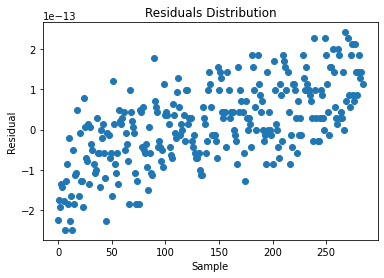

In [117]:
import matplotlib.pyplot as plt

residuals = test_results.residuals.toPandas()

plt.scatter(range(residuals.shape[0]), residuals)
plt.xlabel("Sample")
plt.ylabel("Residual")
plt.title("Residuals Distribution")
plt.show()

# Iterations

In [21]:
final_data.describe().show()

+-------+------------------+
|summary|        math score|
+-------+------------------+
|  count|              1000|
|   mean|            66.089|
| stddev|15.163080096009454|
|    min|                 0|
|    max|               100|
+-------+------------------+



In [22]:
train_data,test_data = final_data.randomSplit([0.7,0.3])
train_data.describe().show()
test_data.describe().show()
lr = LinearRegression(labelCol='math score')
lrModel = lr.fit(train_data)
test_results = lrModel.evaluate(test_data)

+-------+------------------+
|summary|        math score|
+-------+------------------+
|  count|               685|
|   mean| 66.50656934306569|
| stddev|15.015256395309898|
|    min|                 8|
|    max|               100|
+-------+------------------+

+-------+------------------+
|summary|        math score|
+-------+------------------+
|  count|               315|
|   mean| 65.18095238095238|
| stddev|15.464844631364638|
|    min|                 0|
|    max|               100|
+-------+------------------+



23/10/18 13:32:24 WARN Instrumentation: [f4a081cc] regParam is zero, which might cause numerical instability and overfitting.


In [23]:
train_data,test_data = final_data.randomSplit([0.6,0.4])
train_data.describe().show()
test_data.describe().show()
lr = LinearRegression(labelCol='math score')
lrModel = lr.fit(train_data)
test_results = lrModel.evaluate(test_data)

+-------+------------------+
|summary|        math score|
+-------+------------------+
|  count|               599|
|   mean| 66.14190317195326|
| stddev|15.619693117801251|
|    min|                 0|
|    max|               100|
+-------+------------------+

+-------+------------------+
|summary|        math score|
+-------+------------------+
|  count|               401|
|   mean| 66.00997506234414|
| stddev|14.473075010148237|
|    min|                23|
|    max|               100|
+-------+------------------+



23/10/18 13:32:25 WARN Instrumentation: [e16e964c] regParam is zero, which might cause numerical instability and overfitting.


In [24]:
train_data,test_data = final_data.randomSplit([0.8,0.2])
train_data.describe().show()
test_data.describe().show()
lr = LinearRegression(labelCol='math score')
lrModel = lr.fit(train_data)
test_results = lrModel.evaluate(test_data)

+-------+------------------+
|summary|        math score|
+-------+------------------+
|  count|               788|
|   mean| 65.80076142131979|
| stddev|15.500203693507144|
|    min|                 0|
|    max|               100|
+-------+------------------+

+-------+------------------+
|summary|        math score|
+-------+------------------+
|  count|               212|
|   mean| 67.16037735849056|
| stddev|13.819854384629961|
|    min|                23|
|    max|               100|
+-------+------------------+



23/10/18 13:32:27 WARN Instrumentation: [07e1f488] regParam is zero, which might cause numerical instability and overfitting.
